# # BƯỚC 2: CHUẨN BỊ DỮ LIỆU GIỎ HÀNG
# 
# **Mục tiêu:**
# - Chuyển đổi dữ liệu giao dịch thành định dạng giỏ hàng
# - Mã hóa thành ma trận boolean
# - Lưu kết quả cho bước khai phá luật

In [1]:
import sys
sys.path.append('../src')

from apriori_library import BasketPreparer
import pandas as pd

In [3]:
# Tải dữ liệu đã làm sạch
df_clean = pd.read_parquet('../data/processed/basket_bool.parquet')
print(f"Dữ liệu đã làm sạch: {df_clean.shape}")
print(df_clean.head())

Dữ liệu đã làm sạch: (354321, 15)
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34   

   Year  Month  Day  Hour  Weekday    DayName  
0  2010     12    1     8   

In [4]:
# Khởi tạo BasketPreparer
preparer = BasketPreparer(df_clean)

# Tạo basket
basket = preparer.create_basket()
print(f"\nKích thước ma trận basket: {basket.shape}")
print(f"Số lượng giao dịch: {basket.shape[0]}")
print(f"Số lượng sản phẩm: {basket.shape[1]}")

Kích thước basket: (16646, 3844)

Kích thước ma trận basket: (16646, 3844)
Số lượng giao dịch: 16646
Số lượng sản phẩm: 3844


In [5]:
# Hiển thị một phần của basket
print("\n10 dòng đầu tiên của basket (5 cột đầu):")
print(basket.iloc[:10, :5])


10 dòng đầu tiên của basket (5 cột đầu):
Description  4 PURPLE FLOCK DINNER CANDLES  50'S CHRISTMAS GIFT BAG LARGE  \
InvoiceNo                                                                   
536365                                 0.0                            0.0   
536366                                 0.0                            0.0   
536367                                 0.0                            0.0   
536368                                 0.0                            0.0   
536369                                 0.0                            0.0   
536371                                 0.0                            0.0   
536372                                 0.0                            0.0   
536373                                 0.0                            0.0   
536374                                 0.0                            0.0   
536375                                 0.0                            0.0   

Description  DOLLY GIRL BEAKER  I

In [6]:
# Mã hóa thành boolean
basket_bool = preparer.encode_basket(threshold=1)
print(f"\nKích thước basket boolean: {basket_bool.shape}")


Kích thước basket boolean: (16646, 3844)


In [7]:
# Kiểm tra độ thưa của ma trận
total_elements = basket_bool.shape[0] * basket_bool.shape[1]
nonzero_elements = basket_bool.values.sum()
sparsity = (total_elements - nonzero_elements) / total_elements * 100

print(f"\nPHÂN TÍCH ĐỘ THƯA CỦA MA TRẬN:")
print(f"- Tổng phần tử: {total_elements:,}")
print(f"- Phần tử khác 0: {nonzero_elements:,}")
print(f"- Độ thưa: {sparsity:.2f}%")


PHÂN TÍCH ĐỘ THƯA CỦA MA TRẬN:
- Tổng phần tử: 63,987,224
- Phần tử khác 0: 344,342
- Độ thưa: 99.46%


In [8]:
# Thống kê số lượng sản phẩm trên mỗi giao dịch
items_per_transaction = basket_bool.sum(axis=1)
print("\nTHỐNG KÊ SỐ LƯỢNG SẢN PHẨM TRÊN MỖI GIAO DỊCH:")
print(items_per_transaction.describe())


THỐNG KÊ SỐ LƯỢNG SẢN PHẨM TRÊN MỖI GIAO DỊCH:
count    16646.000000
mean        20.686171
std         23.939589
min          1.000000
25%          6.000000
50%         15.000000
75%         27.000000
max        541.000000
dtype: float64


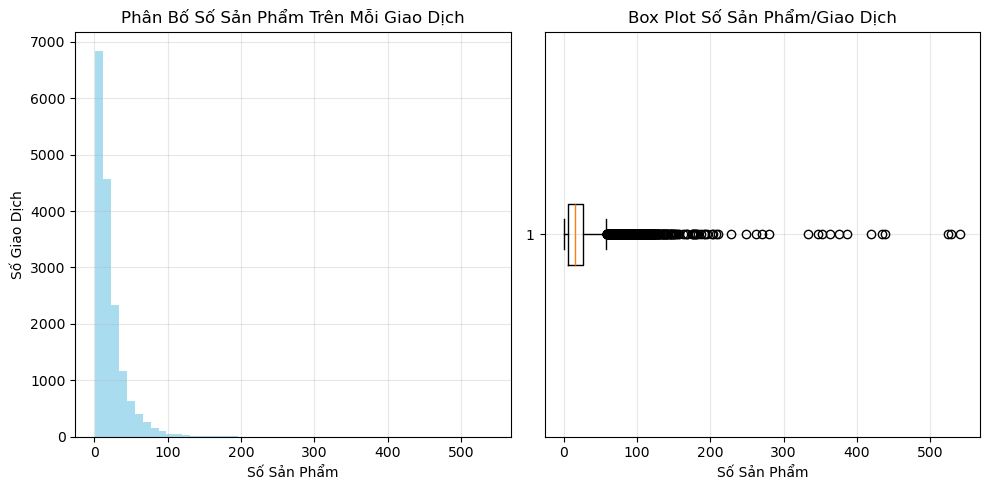

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Biểu đồ phân bố số sản phẩm trên mỗi giao dịch
plt.subplot(1, 2, 1)
items_per_transaction.hist(bins=50, color='skyblue', alpha=0.7)
plt.title('Phân Bố Số Sản Phẩm Trên Mỗi Giao Dịch')
plt.xlabel('Số Sản Phẩm')
plt.ylabel('Số Giao Dịch')
plt.grid(True, alpha=0.3)

# Box plot
plt.subplot(1, 2, 2)
plt.boxplot(items_per_transaction, vert=False)
plt.title('Box Plot Số Sản Phẩm/Giao Dịch')
plt.xlabel('Số Sản Phẩm')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
preparer.save_basket('../data/processed/basket_bool.parquet')


Đã lưu basket vào: ../data/processed/basket_bool.parquet
